In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [37]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


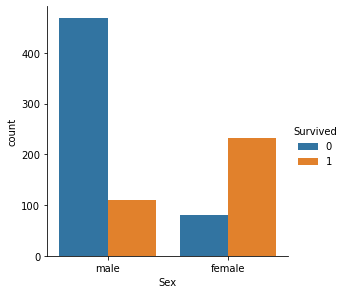

In [40]:
sns.catplot(x='Sex',data=df,hue='Survived',kind='count', height = 4)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

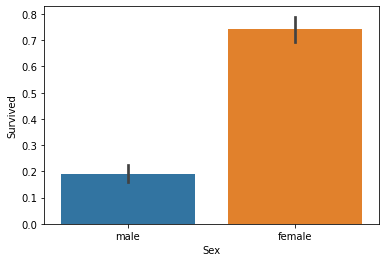

In [41]:
sns.barplot(x= 'Sex', y= 'Survived', data = df)

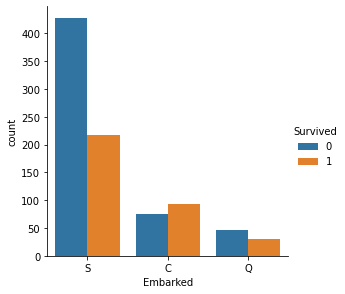

In [42]:
sns.catplot(x='Embarked',data=df,hue='Survived',kind='count', height = 4)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

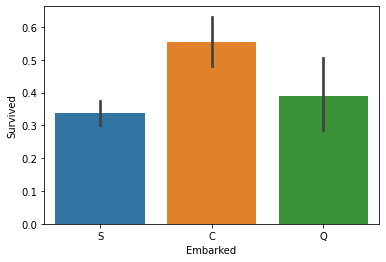

In [43]:
sns.barplot(x= 'Embarked', y= 'Survived', data = df)

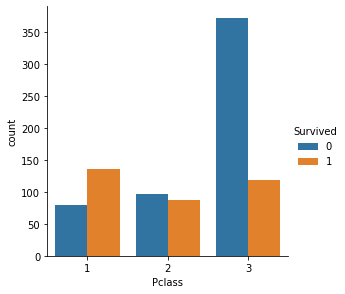

In [44]:
sns.catplot(x='Pclass',data=df,hue='Survived',kind='count', height = 4)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

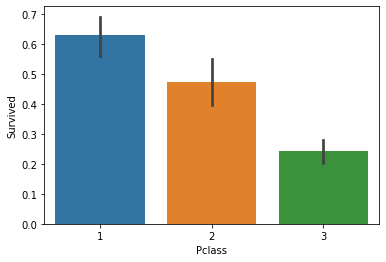

In [45]:
sns.barplot(x= 'Pclass', y= 'Survived', data = df)

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch'], axis = 1, inplace = True)

In [49]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [50]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [51]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [52]:
df['Age'] = df['Age']//10

<AxesSubplot:xlabel='Age', ylabel='Survived'>

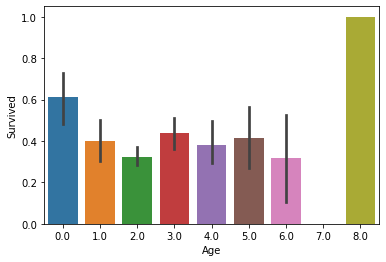

In [53]:
sns.barplot(x= 'Age', y= 'Survived', data = df)

In [54]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,2.0,7.2500,S
1,1,1,female,3.0,71.2833,C
2,1,3,female,2.0,7.9250,S
3,1,1,female,3.0,53.1000,S
4,0,3,male,3.0,8.0500,S


In [55]:
age_dummies = pd.get_dummies(df['Age'])
df = pd.concat([df,age_dummies], axis =1)
df.drop(['Age'], axis =1, inplace = True)
df.head()

,Survived,Pclass,Sex,Fare,Embarked,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,0,3,male,7.2500,S,0,0,1,0,0,0,0,0,0
1,1,1,female,71.2833,C,0,0,0,1,0,0,0,0,0
2,1,3,female,7.9250,S,0,0,1,0,0,0,0,0,0
3,1,1,female,53.1000,S,0,0,0,1,0,0,0,0,0
4,0,3,male,8.0500,S,0,0,0,1,0,0,0,0,0


In [58]:
df['Embarked'].replace({'S':2,'C':0,'Q':1}, inplace = True)

In [59]:
df.head()

,Survived,Pclass,Sex,Fare,Embarked,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,0,3,male,7.2500,2,0,0,1,0,0,0,0,0,0
1,1,1,female,71.2833,0,0,0,0,1,0,0,0,0,0
2,1,3,female,7.9250,2,0,0,1,0,0,0,0,0,0
3,1,1,female,53.1000,2,0,0,0,1,0,0,0,0,0
4,0,3,male,8.0500,2,0,0,0,1,0,0,0,0,0


In [60]:
sex_dummies = pd.get_dummies(df['Sex'])
df = pd.concat([df,sex_dummies], axis =1)
df.drop(['Sex'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Fare,Embarked,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,female,male
0,0,3,7.2500,2,0,0,1,0,0,0,0,0,0,0,1
1,1,1,71.2833,0,0,0,0,1,0,0,0,0,0,1,0
2,1,3,7.9250,2,0,0,1,0,0,0,0,0,0,1,0
3,1,1,53.1000,2,0,0,0,1,0,0,0,0,0,1,0
4,0,3,8.0500,2,0,0,0,1,0,0,0,0,0,0,1


In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

In [95]:
a = df['Fare']
a = a.to_numpy()
a = a.reshape(len(df),1)
df['Fare'] = scaler.fit_transform(a)

In [96]:
df

,Survived,Pclass,Fare,Embarked,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,female,male
0,0,3,0.014151,2,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0.139136,0,0,0,0,1,0,0,0,0,0,1,0
2,1,3,0.015469,2,0,0,1,0,0,0,0,0,0,1,0
3,1,1,0.103644,2,0,0,0,1,0,0,0,0,0,1,0
4,0,3,0.015713,2,0,0,0,1,0,0,0,0,0,0,1
5,0,3,0.016510,1,0,0,1,0,0,0,0,0,0,0,1
6,0,1,0.101229,2,0,0,0,0,0,1,0,0,0,0,1
7,0,3,0.041136,2,1,0,0,0,0,0,0,0,0,0,1
8,1,3,0.021731,2,0,0,1,0,0,0,0,0,0,1,0
9,1,2,0.058694,0,0,1,0,0,0,0,0,0,0,1,0


In [102]:
X = df.iloc[:,1:]
y = df['Survived']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [106]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       110
           1       0.72      0.68      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.78       179



In [108]:
import xgboost as xg
clf_xg = xg.XGBClassifier(eval_metric='mlogloss', use_label_encoder =False)
model_xg = clf_xg.fit(X_train, y_train)
print(classification_report(y_test,model_xg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.78      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [120]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
model_svc = svc.fit(X_train, y_train)
print(classification_report(y_test,model_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



In [122]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(X_train, y_train)
print(classification_report(y_test,model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [124]:
from sklearn.model_selection import GridSearchCV

In [149]:
clf_xg = xg.XGBClassifier(eval_metric='mlogloss', use_label_encoder =False)
params = {
    'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [6, 7, 8]
}
grid=GridSearchCV(clf_xg,param_grid=params,scoring='accuracy',n_jobs=-1,cv=3,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=False,
                                     validate_parameters=N

In [150]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='mlogloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [151]:
clf_xg_t = grid.best_estimator_
model_xg_t = clf_xg_t.fit(X_train,y_train)
print(classification_report(y_test,model_xg_t.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [144]:
params_rf = {'n_estimators': [i for i in range(1,50)],
          'max_depth': [6,8],
}

In [145]:
rf = RandomForestClassifier()
grid = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 3, verbose=2, n_jobs = -1, scoring='accuracy')

In [146]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=2)

In [147]:
rf_t = grid.best_estimator_
model_rf_t = clf_xg_t.fit(X_train,y_train)
print(classification_report(y_test,model_rf_t.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [148]:
grid.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=24)

In [153]:
from sklearn.metrics import accuracy_score

In [154]:
score_arr =[]
for i in range(4,100):
    clf_xg = xg.XGBClassifier(eval_metric='mlogloss', use_label_encoder =False, max_depth =i)
    model_xg = clf_xg.fit(X_train, y_train)
    score_arr.append(accuracy_score(y_test,model_xg.predict(X_test)))

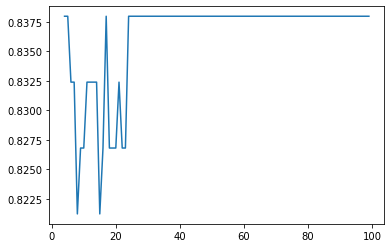

In [155]:
plt.plot(range(4,100), score_arr)

In [166]:
clf_xg_f = xg.XGBClassifier(eval_metric='mlogloss', use_label_encoder =False, max_depth =17)
model_xg_f = clf_xg_f.fit(X_train, y_train)
print(classification_report(y_test,model_xg_f.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       110
           1       0.79      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [167]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
df2.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch'], axis = 1, inplace = True)

In [169]:
df2.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


In [170]:
sex_dummies2 = pd.get_dummies(df2['Sex'])
df2 = pd.concat([df2,sex_dummies2], axis =1)
df2.drop(['Sex'], axis = 1, inplace = True)
df2.head()

,Pclass,Age,Fare,Embarked,female,male
0,3,34.5,7.8292,Q,0,1
1,3,47.0,7.0000,S,1,0
2,2,62.0,9.6875,Q,0,1
3,3,27.0,8.6625,S,0,1
4,3,22.0,12.2875,S,1,0


In [171]:
df2.isnull().sum()

Pclass       0
Age         86
Fare         1
Embarked     0
female       0
male         0
dtype: int64

In [173]:
df2['Age'].fillna(df2['Age'].median(), inplace = True)
df2['Fare'].fillna(df2['Fare'].median(), inplace = True)

In [174]:
df2.isnull().sum()

Pclass      0
Age         0
Fare        0
Embarked    0
female      0
male        0
dtype: int64

In [175]:
df2['Age'] = df2['Age']//10

In [176]:
age_dummies2 = pd.get_dummies(df2['Age'])
df2 = pd.concat([df2,age_dummies2], axis =1)
df2.drop(['Age'], axis =1, inplace = True)
df2.head()

,Pclass,Fare,Embarked,female,male,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
0,3,7.8292,Q,0,1,0,0,0,1,0,0,0,0
1,3,7.0000,S,1,0,0,0,0,0,1,0,0,0
2,2,9.6875,Q,0,1,0,0,0,0,0,0,1,0
3,3,8.6625,S,0,1,0,0,1,0,0,0,0,0
4,3,12.2875,S,1,0,0,0,1,0,0,0,0,0


In [177]:
len(df2)

418

In [182]:
col = np.zeros(418)
col = pd.DataFrame({8.0 : col})

In [184]:
df2 = pd.concat([df2,col], axis = 1)

In [185]:
df2.head()

,Pclass,Fare,Embarked,female,male,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,3,7.8292,Q,0,1,0,0,0,1,0,0,0,0,0.0
1,3,7.0000,S,1,0,0,0,0,0,1,0,0,0,0.0
2,2,9.6875,Q,0,1,0,0,0,0,0,0,1,0,0.0
3,3,8.6625,S,0,1,0,0,1,0,0,0,0,0,0.0
4,3,12.2875,S,1,0,0,0,1,0,0,0,0,0,0.0


In [186]:
scaler = MinMaxScaler()
a2 = df2['Fare']
a2 = a2.to_numpy()
a2 = a2.reshape(len(df2),1)
df2['Fare'] = scaler.fit_transform(a2)

In [187]:
df2.head()

,Pclass,Fare,Embarked,female,male,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,3,0.015282,Q,0,1,0,0,0,1,0,0,0,0,0.0
1,3,0.013663,S,1,0,0,0,0,0,1,0,0,0,0.0
2,2,0.018909,Q,0,1,0,0,0,0,0,0,1,0,0.0
3,3,0.016908,S,0,1,0,0,1,0,0,0,0,0,0.0
4,3,0.023984,S,1,0,0,0,1,0,0,0,0,0,0.0


In [188]:
df2['Embarked'].replace({'S':2,'C':0,'Q':1}, inplace = True)

In [190]:
pred = model_xg_f.predict(df2)
dict = {'PassengerId':range(892,1310),'Survived':pred}
ans = pd.DataFrame(dict)
ans.to_csv('answer.csv',index=False)

In [191]:
len(pred)

418